In [156]:
#https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("ml").getOrCreate()

In [2]:
df = spark.read.csv("/common_folder/heart.csv",header=True)

In [3]:
df.show(5)

+---+---+---------+---+----------+---+-----------+--------------+---------------+-------------+--------+--------------------+----+-------------+----+
|age|sex|pain type| BP|cholestrol|fbs|resting ecg|max heart rate|exercise angina|ST depression|ST slope|flouroscopy coloured|thal|heart disease|_c14|
+---+---+---------+---+----------+---+-----------+--------------+---------------+-------------+--------+--------------------+----+-------------+----+
| 70|  1|        4|130|       322|  0|          2|           109|              0|          2.4|       2|                   3|   3|            2|null|
| 67|  0|        3|115|       564|  0|          2|           160|              0|          1.6|       2|                   0|   7|            1|null|
| 57|  1|        2|124|       261|  0|          0|           141|              0|          0.3|       1|                   0|   7|            2|null|
| 64|  1|        4|128|       263|  0|          0|           105|              1|          0.2|     

In [4]:
from pyspark.sql.functions import min, max

In [5]:
#6 Now, create a new DataFrame with only the 'age' column from the original DataFrame. Save it to a variable, say 'heart_age'.

In [6]:
df.createOrReplaceTempView("dfTable")

In [13]:
df2=spark.sql("SELECT age  FROM dfTable")

In [26]:

df3=df2.withColumn("age2", df2["age"].cast("Int"))
df3.show()

+---+----+
|age|age2|
+---+----+
| 70|  70|
| 67|  67|
| 57|  57|
| 64|  64|
| 74|  74|
| 65|  65|
| 56|  56|
| 59|  59|
| 60|  60|
| 63|  63|
| 59|  59|
| 53|  53|
| 44|  44|
| 61|  61|
| 57|  57|
| 71|  71|
| 46|  46|
| 53|  53|
| 64|  64|
| 40|  40|
+---+----+
only showing top 20 rows



In [15]:
#7 Now we need to bucket these age groups to four different buckets. 
#The range will be defined by [29, 40, 50, 60, 70, 80]. You need to use the following function
#from pyspark.ml.feature import Bucketizer

In [18]:
from pyspark.ml.feature import Bucketizer

In [50]:
bucketizer = Bucketizer(splits=[29, 40, 50, 60, 70, 80], inputCol="age2", outputCol="buckets")
bucketed = bucketizer.transform(df3)


In [72]:
#What is the count of observations for each bucket? To answer this, you need to use the group by and aggregate functions.

#bucketed.crosstab("age2","buckets").show()
bucketed.groupBy("buckets").count().show()

+-------+-----+
|buckets|count|
+-------+-----+
|    0.0|   12|
|    1.0|   67|
|    4.0|   10|
|    3.0|   74|
|    2.0|  107|
+-------+-----+



In [62]:
print("Bucketizer output with %d buckets" % (len(bucketizer.getSplits())-1))
bucketed.show()

Bucketizer output with 5 buckets
+---+----+-------+
|age|age2|buckets|
+---+----+-------+
| 70|  70|    4.0|
| 67|  67|    3.0|
| 57|  57|    2.0|
| 64|  64|    3.0|
| 74|  74|    4.0|
| 65|  65|    3.0|
| 56|  56|    2.0|
| 59|  59|    2.0|
| 60|  60|    3.0|
| 63|  63|    3.0|
| 59|  59|    2.0|
| 53|  53|    2.0|
| 44|  44|    1.0|
| 61|  61|    3.0|
| 57|  57|    2.0|
| 71|  71|    4.0|
| 46|  46|    1.0|
| 53|  53|    2.0|
| 64|  64|    3.0|
| 40|  40|    1.0|
+---+----+-------+
only showing top 20 rows



In [164]:
bucketed.sort(bucketed.age2.asc()).collect()

#df.sort(df.age.desc()).collect()

[Row(age='29', age2=29, buckets=0.0),
 Row(age='34', age2=34, buckets=0.0),
 Row(age='34', age2=34, buckets=0.0),
 Row(age='35', age2=35, buckets=0.0),
 Row(age='35', age2=35, buckets=0.0),
 Row(age='35', age2=35, buckets=0.0),
 Row(age='37', age2=37, buckets=0.0),
 Row(age='37', age2=37, buckets=0.0),
 Row(age='38', age2=38, buckets=0.0),
 Row(age='39', age2=39, buckets=0.0),
 Row(age='39', age2=39, buckets=0.0),
 Row(age='39', age2=39, buckets=0.0),
 Row(age='40', age2=40, buckets=1.0),
 Row(age='40', age2=40, buckets=1.0),
 Row(age='40', age2=40, buckets=1.0),
 Row(age='41', age2=41, buckets=1.0),
 Row(age='41', age2=41, buckets=1.0),
 Row(age='41', age2=41, buckets=1.0),
 Row(age='41', age2=41, buckets=1.0),
 Row(age='41', age2=41, buckets=1.0),
 Row(age='41', age2=41, buckets=1.0),
 Row(age='41', age2=41, buckets=1.0),
 Row(age='41', age2=41, buckets=1.0),
 Row(age='41', age2=41, buckets=1.0),
 Row(age='42', age2=42, buckets=1.0),
 Row(age='42', age2=42, buckets=1.0),
 Row(age='42

In [ ]:
#9 We are now done with questions on feature transformation. 
#Let's now try to perform linear regression using the MLlib library.

In [73]:
#10 For this, we need to first load a new DataFrame, which is available at: 
#/common_folder/Advertising.csv
df_heart = spark.read.csv("/common_folder/Advertising.csv",header=True)

In [76]:
df_heart.show()
y=df_heart.Sales

+-----+-----+---------+-----+
|   TV|Radio|Newspaper|Sales|
+-----+-----+---------+-----+
|230.1| 37.8|     69.2| 22.1|
| 44.5| 39.3|     45.1| 10.4|
| 17.2| 45.9|     69.3|  9.3|
|151.5| 41.3|     58.5| 18.5|
|180.8| 10.8|     58.4| 12.9|
|  8.7| 48.9|       75|  7.2|
| 57.5| 32.8|     23.5| 11.8|
|120.2| 19.6|     11.6| 13.2|
|  8.6|  2.1|        1|  4.8|
|199.8|  2.6|     21.2| 10.6|
| 66.1|  5.8|     24.2|  8.6|
|214.7|   24|        4| 17.4|
| 23.8| 35.1|     65.9|  9.2|
| 97.5|  7.6|      7.2|  9.7|
|204.1| 32.9|       46|   19|
|195.4| 47.7|     52.9| 22.4|
| 67.8| 36.6|      114| 12.5|
|281.4| 39.6|     55.8| 24.4|
| 69.2| 20.5|     18.3| 11.3|
|147.3| 23.9|     19.1| 14.6|
+-----+-----+---------+-----+
only showing top 20 rows



In [117]:
df_heart.cache()

DataFrame[TV: string, Radio: string, Newspaper: string, Sales: string, TV2: int]

In [85]:
df_heart.printSchema()

root
 |-- TV: string (nullable = true)
 |-- Radio: string (nullable = true)
 |-- Newspaper: string (nullable = true)
 |-- Sales: string (nullable = true)



In [86]:
df_heart.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
TV,200,147.0425,85.85423631490805,0.7,97.5
Radio,200,23.264000000000024,14.846809176168728,0,9.9
Newspaper,200,30.553999999999995,21.77862083852283,0.3,9.5
Sales,200,14.022500000000003,5.217456565710477,1.6,9.9


In [132]:
df_heart.dtypes

[('TV', 'string'),
 ('Radio', 'string'),
 ('Newspaper', 'string'),
 ('Sales', 'string'),
 ('TV2', 'int')]

In [133]:
#df_heart['TV'].cast("int")
df_heart2 = df_heart.withColumn("TV2", df_heart["TV"].cast("Int"))
df_heart2 = df_heart2.withColumn("Radio2", df_heart["Radio"].cast("Int"))
df_heart2 = df_heart2.withColumn("Newspaper2", df_heart["Newspaper"].cast("Int"))
df_heart2 = df_heart2.withColumn("Sales2", df_heart["Sales"].cast("Int"))

df_heart2=df_heart2.drop("TV","Radio","Newspaper","Sales")
df_heart2.describe()
#type(df_heart)

DataFrame[summary: string, TV2: string, Radio2: string, Newspaper2: string, Sales2: string]

In [134]:
df_heart2.dtypes

[('TV2', 'int'), ('Radio2', 'int'), ('Newspaper2', 'int'), ('Sales2', 'int')]

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


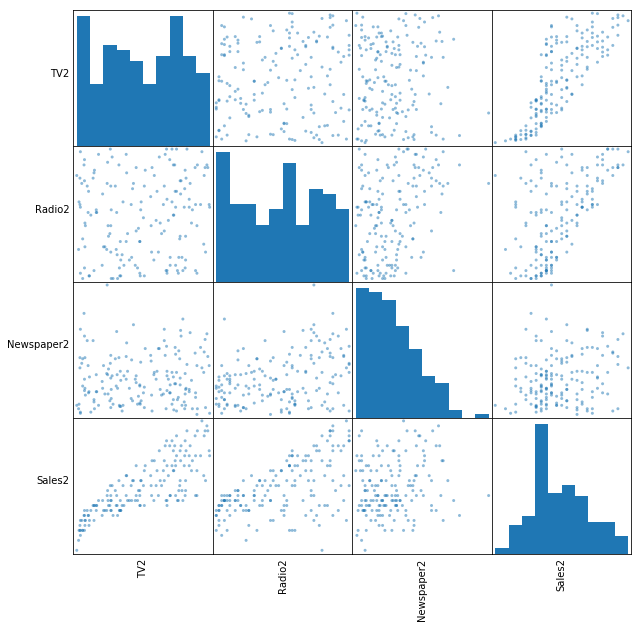

In [135]:
import pandas as pd
numeric_features = [t[0] for t in df_heart2.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = df_heart2.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [137]:
import six
for i in df_heart2.columns:
    if not( isinstance(df_heart2.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to Sales for ", i, df_heart2.stat.corr('Sales2',i))

Correlation to Sales for  TV2 0.7780435157962534
Correlation to Sales for  Radio2 0.579960026196858
Correlation to Sales for  Newspaper2 0.229428864426175
Correlation to Sales for  Sales2 1.0


In [140]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['TV2', 'Radio2', 'Newspaper2'], outputCol = 'features')
vdf_heart2 = vectorAssembler.transform(df_heart2)
vdf_heart2 = vdf_heart2.select(['features', 'Sales2'])
vdf_heart2.show(3)

+-----------------+------+
|         features|Sales2|
+-----------------+------+
|[230.0,37.0,69.0]|    22|
| [44.0,39.0,45.0]|    10|
| [17.0,45.0,69.0]|     9|
+-----------------+------+
only showing top 3 rows



In [141]:
splits = vdf_heart2.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]


# Linear Regression

In [165]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol='Sales2', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.04183567733762611,0.1742100780619715,0.0]
Intercept: 3.5613106356324624


In [143]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 1.678049
r2: 0.896628


In [144]:
train_df.describe().show()

+-------+------------------+
|summary|            Sales2|
+-------+------------------+
|  count|               141|
|   mean|13.553191489361701|
| stddev| 5.237809700239886|
|    min|                 5|
|    max|                27|
+-------+------------------+



In [145]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","Sales2","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Sales2",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+-----------------+------+---------------+
|       prediction|Sales2|       features|
+-----------------+------+---------------+
|10.35550368004935|     1| [0.0,39.0,8.0]|
|5.644964203664653|     3| [4.0,11.0,5.0]|
|4.244416210457414|     4|  [8.0,2.0,1.0]|
|8.599668162006703|     5| [8.0,27.0,2.0]|
|4.105174441021601|     5|[13.0,0.0,25.0]|
+-----------------+------+---------------+
only showing top 5 rows

R Squared (R2) on test data = 0.865217


In [146]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 1.94192


In [147]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 10
objectiveHistory: [0.5, 0.41341853220754565, 0.11140917198126914, 0.10996477378460404, 0.10996290728595813, 0.10996274794937709, 0.10996274721525504, 0.10996274720015967, 0.10996274719983745, 0.10996274719983123]
+--------------------+
|           residuals|
+--------------------+
| -3.8225812861177673|
| -3.7320425627310474|
|  -4.474143343350763|
|  -5.258079801308103|
|  -3.293065896577323|
| -1.7183256119511743|
| -3.7217148296992555|
| -2.7182900386650513|
| -1.1435497540389026|
| -0.8403900662867887|
|  0.4764865722451983|
| -2.3979708224558003|
|   1.134915998189661|
|   2.093080320852035|
|-0.03925850658618...|
| -1.6873779861419198|
|  1.3263033913518303|
| -2.1194694969411145|
| 0.11029320923835506|
| 0.24266760996270165|
+--------------------+
only showing top 20 rows



In [148]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","Sales2","features").show()

+------------------+------+-----------------+
|        prediction|Sales2|         features|
+------------------+------+-----------------+
| 10.35550368004935|     1|   [0.0,39.0,8.0]|
| 5.644964203664653|     3|   [4.0,11.0,5.0]|
| 4.244416210457414|     4|    [8.0,2.0,1.0]|
| 8.599668162006703|     5|   [8.0,27.0,2.0]|
| 4.105174441021601|     5|  [13.0,0.0,25.0]|
| 4.969357462619993|     5|  [17.0,4.0,31.0]|
|12.111970663160825|     9| [17.0,45.0,69.0]|
|  6.40487376445339|     6| [18.0,12.0,23.0]|
|7.9727644670111335|     7| [18.0,21.0,50.0]|
|10.620883946566865|     9| [23.0,35.0,65.0]|
| 8.962454520622403|     8| [25.0,25.0,43.0]|
|11.401395613490005|     9|  [25.0,39.0,9.0]|
|12.335515252340713|    10|  [39.0,41.0,5.0]|
| 9.715496712699673|     9| [43.0,25.0,20.0]|
|12.635863827484386|    12|[67.0,36.0,114.0]|
| 9.576886408332685|    10| [73.0,17.0,12.0]|
|11.270284142903305|    11| [76.0,26.0,22.0]|
|14.838157058817988|    14| [78.0,46.0,34.0]|
|  8.85257662123893|    10|  [89.0

## DecisionTree

In [150]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'Sales2')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(
    labelCol="Sales2", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 1.66814


In [151]:
dt_model.featureImportances

SparseVector(3, {0: 0.5743, 1: 0.4153, 2: 0.0104})

In [153]:
df_heart2.take(1)

[Row(TV2=230, Radio2=37, Newspaper2=69, Sales2=22)]

# Gradient Boost Method

In [154]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'Sales2', maxIter=10)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)
gbt_predictions.select('prediction', 'Sales2', 'features').show(5)

+------------------+------+---------------+
|        prediction|Sales2|       features|
+------------------+------+---------------+
|6.6488067854748545|     1| [0.0,39.0,8.0]|
| 5.096081732338727|     3| [4.0,11.0,5.0]|
| 5.016548345501165|     4|  [8.0,2.0,1.0]|
| 4.997599057421966|     5| [8.0,27.0,2.0]|
| 5.073444015629383|     5|[13.0,0.0,25.0]|
+------------------+------+---------------+
only showing top 5 rows



In [155]:
gbt_evaluator = RegressionEvaluator(
    labelCol="Sales2", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 1.68899


# Practice Question

In [167]:
df_home = spark.read.json("/common_folder/amazon_reviews_graded/reviews_Home_and_Kitchen_5.json")

In [169]:
df_home.show()

+----------+--------+-------+--------------------+-----------+--------------+--------------------+--------------------+--------------+
|      asin| helpful|overall|          reviewText| reviewTime|    reviewerID|        reviewerName|             summary|unixReviewTime|
+----------+--------+-------+--------------------+-----------+--------------+--------------------+--------------------+--------------+
|0615391206|  [0, 0]|    5.0|My daughter wante...|10 19, 2013| APYOBQE6M18AA|     Martin Schwartz|          Best Price|    1382140800|
|0615391206|  [0, 0]|    5.0|I bought this zok...|06 18, 2014|A1JVQTAGHYOL7F|       Michelle Dinh|                zoku|    1403049600|
|0615391206|[26, 27]|    4.0|There is no short...| 05 5, 2013|A3UPYGJKZ0XTU4|        mirasreviews|Excels at Sweet D...|    1367712000|
|0615391206|[14, 18]|    5.0|This book is a mu...| 08 4, 2011|A2MHCTX43MIMDZ|M. Johnson "Tea L...|     Creative Combos|    1312416000|
|0615391206|  [0, 0]|    4.0|This cookbook is ...| 06 7

In [172]:
df_home.createOrReplaceTempView("dfHome") 


In [181]:
spark.sql("SELECT count( distinct asin) FROM dfHome").show()

+--------------------+
|count(DISTINCT asin)|
+--------------------+
|               28237|
+--------------------+



In [180]:
spark.sql("SELECT count(asin) FROM dfHome").show()

+-----------+
|count(asin)|
+-----------+
|     551682|
+-----------+



In [182]:
spark.sql("SELECT count( distinct reviewerID) FROM dfHome").show()

+--------------------------+
|count(DISTINCT reviewerID)|
+--------------------------+
|                     66519|
+--------------------------+



In [184]:
review_length= spark.sql('SELECT helpful, overall, reviewText, reviewTime, summary, asin, LENGTH(reviewText) AS reviewLength FROM dfHome')

In [185]:
review_length.show()

+--------+-------+--------------------+-----------+--------------------+----------+------------+
| helpful|overall|          reviewText| reviewTime|             summary|      asin|reviewLength|
+--------+-------+--------------------+-----------+--------------------+----------+------------+
|  [0, 0]|    5.0|My daughter wante...|10 19, 2013|          Best Price|0615391206|         158|
|  [0, 0]|    5.0|I bought this zok...|06 18, 2014|                zoku|0615391206|         125|
|[26, 27]|    4.0|There is no short...| 05 5, 2013|Excels at Sweet D...|0615391206|        2353|
|[14, 18]|    5.0|This book is a mu...| 08 4, 2011|     Creative Combos|0615391206|         334|
|  [0, 0]|    4.0|This cookbook is ...| 06 7, 2014|A must own if you...|0615391206|         538|
|  [0, 0]|    5.0|If you have a Zok...| 06 7, 2014|             Love it|0615391206|         196|
|  [2, 3]|    5.0|This book is so b...| 07 2, 2012|Beautifully illus...|0615391206|         476|
|[32, 39]|    2.0|I bought thi

0.9754901960784313

In [187]:
review_length.sort( review_length.reviewLength.desc()).show()

+------------+-------+--------------------+-----------+--------------------+----------+------------+
|     helpful|overall|          reviewText| reviewTime|             summary|      asin|reviewLength|
+------------+-------+--------------------+-----------+--------------------+----------+------------+
|      [0, 0]|    5.0|"One chews coffee...|12 31, 2013|6 YEARS AND OVER ...|B00009ADDR|       30808|
|      [4, 4]|    5.0|"One chews coffee...|04 11, 2012|SIX YEARS WITH A ...|B005FCE72U|       30804|
|      [0, 0]|    5.0|"One chews coffee...|04 24, 2014|SIX YEARS WITH A ...|B004XGBLNC|       30802|
|  [398, 408]|    5.0|I spent over a ye...| 10 4, 2012|My Research Paid ...|B001L7OIVI|       29087|
|    [27, 29]|    4.0|OVERVIEW: As a lo...| 01 7, 2013|Face-off: Rancili...|B008TUWP24|       23118|
|    [83, 89]|    5.0|Face-off: Rancili...| 01 7, 2013|Face-off: Rancili...|B007KAYU68|       22893|
|  [139, 149]|    4.0|OVERVIEW: As a lo...| 01 7, 2013|Face-off: Rancili...|B008TV3S1K|    

In [196]:
 398/ 408

0.9754901960784313

In [199]:
review_length2= spark.sql('SELECT helpful FROM dfHome order by helpful[1] desc')

In [201]:
review_length2.show()

+--------------+
|       helpful|
+--------------+
|[52176, 52861]|
|  [6128, 6174]|
|  [5247, 5307]|
|  [5081, 5126]|
|  [5034, 5088]|
|  [4736, 4768]|
|  [3941, 4009]|
|  [3716, 3787]|
|  [2777, 2817]|
|  [2618, 2714]|
|  [2282, 2523]|
|  [2247, 2330]|
|  [2108, 2142]|
|  [2029, 2066]|
|  [1719, 1931]|
|  [1896, 1914]|
|  [1683, 1890]|
|  [1862, 1875]|
|  [1751, 1798]|
|  [1642, 1699]|
+--------------+
only showing top 20 rows



+--------------+
|       helpful|
+--------------+
|[52176, 52861]|
|  [6128, 6174]|
|  [5247, 5307]|
|  [5081, 5126]|
|  [5034, 5088]|
|  [4736, 4768]|
|  [3941, 4009]|
|  [3716, 3787]|
|  [2777, 2817]|
|  [2618, 2714]|
|  [2282, 2523]|
|  [2247, 2330]|
|  [2108, 2142]|
|  [2029, 2066]|
|  [1719, 1931]|
|  [1896, 1914]|
|  [1683, 1890]|
|  [1862, 1875]|
|  [1751, 1798]|
|  [1642, 1699]|
+--------------+
only showing top 20 rows

